# In this notebook we evaluate our trained ViT models on the new dataset (test dataset).

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers, metrics
import tensorflow_addons as tfa
import numpy as np
import pandas as pd
import os
import pickle
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from pneumonia_models import vision_transformer

sns.set_theme()


In [2]:
# LOAD TEST DATA
with open('x_test.pkl', 'rb') as f:
    x_test = pickle.load(f)

with open('y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

In [3]:
# Defining global variables
INPUT_SHAPE = (224, 224, 3)
BATCH_SIZE = 64
PATCH_SIZE = 14
NUM_PATCHES = 256
PROJECTION_DIM = 64 # Dimension per head
TRANSFORMER_LAYERS = 6
ATTENTION_HEADS = 3
MLP_HEADS_UNITS = [2048, 1024]
CLASSES = 2
WEIGHT_DECAY = 0.005
LEARNING_RATE = 0.001
NUM_EPOCHS = 200

In [4]:
ViT_6_AdamW = vision_transformer(
    input_shape=INPUT_SHAPE,
    patch_size=PATCH_SIZE,
    num_patches=NUM_PATCHES,
    projection_dim=PROJECTION_DIM,
    transformer_layers=TRANSFORMER_LAYERS,
    num_heads=ATTENTION_HEADS,
    mlp_heads_units=MLP_HEADS_UNITS,
    num_classes=CLASSES,
    is_binary=True
)

ViT_6_SGD = vision_transformer(
    input_shape=INPUT_SHAPE,
    patch_size=PATCH_SIZE,
    num_patches=NUM_PATCHES,
    projection_dim=PROJECTION_DIM,
    transformer_layers=TRANSFORMER_LAYERS,
    num_heads=ATTENTION_HEADS,
    mlp_heads_units=MLP_HEADS_UNITS,
    num_classes=CLASSES,
    is_binary=True
)

In [5]:
AdamW_optimizer = tfa.optimizers.AdamW(learning_rate=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
ViT_6_AdamW.compile(
    optimizer=AdamW_optimizer,
    loss="binary_crossentropy",
    metrics=[metrics.BinaryAccuracy(name="accuracy"), metrics.Recall(name="recall"), metrics.Precision(name="precision")]
)

SGD_optimizer = optimizers.SGD(learning_rate=LEARNING_RATE, momentum=0.9)
ViT_6_SGD.compile(
    optimizer=SGD_optimizer,
    loss="binary_crossentropy",
    metrics=[metrics.BinaryAccuracy(name="accuracy"), metrics.Recall(name="recall"), metrics.Precision(name="precision")]
)

## Evaluate AdamW

In [6]:
# LOAD WEIGHTS FROM TRAINED ViTs
ViT_6_AdamW.load_weights("./checkpoints/AdamW/checkpointAdamW")

In [7]:
score_ViT_6_AdamW = ViT_6_AdamW.evaluate(x_test, y_test)

20/20 [==============================] - 17s 78ms/step - loss: 0.8779 - accuracy: 0.7356 - recall: 0.9897 - precision: 0.7057


In [9]:
pred_probs_ViT_6_AdamW = ViT_6_AdamW.predict(x_test)
pred_ViT_6_AdamW = [(0 if prob[0]<=0.5 else 1) for prob in pred_probs_ViT_6_AdamW]

In [17]:
cm_AdamW = confusion_matrix(y_test, pred_ViT_6_AdamW)

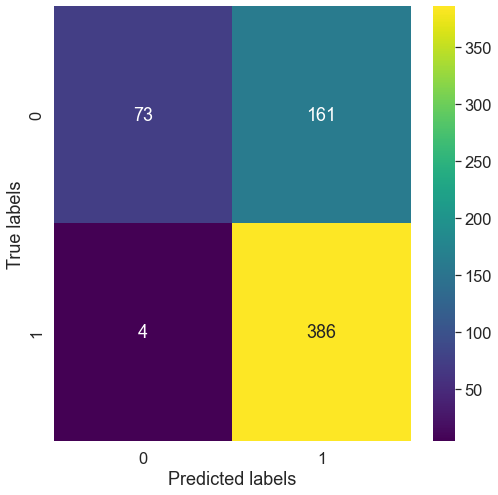

In [41]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1.5)
sns.heatmap(cm_AdamW, annot=True, fmt=".0f", cmap="viridis")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.savefig("confusion_matrix_AdamW.svg")

## Evaluate SGD

In [33]:
# LOAD WEIGHTS FROM TRAINED ViTs
ViT_6_SGD.load_weights("./checkpoints/SGD/checkpointSGD")

In [34]:
score_ViT_6_SGD = ViT_6_SGD.evaluate(x_test, y_test)

20/20 [==============================] - 24s 155ms/step - loss: 1.0767 - accuracy: 0.7580 - recall: 0.9846 - precision: 0.7259


In [35]:
pred_probs_ViT_6_SGD = ViT_6_SGD.predict(x_test)
pred_ViT_6_SGD = [(0 if prob[0]<=0.5 else 1) for prob in pred_probs_ViT_6_SGD]

In [36]:
cm_SGD = confusion_matrix(y_test, pred_ViT_6_SGD)

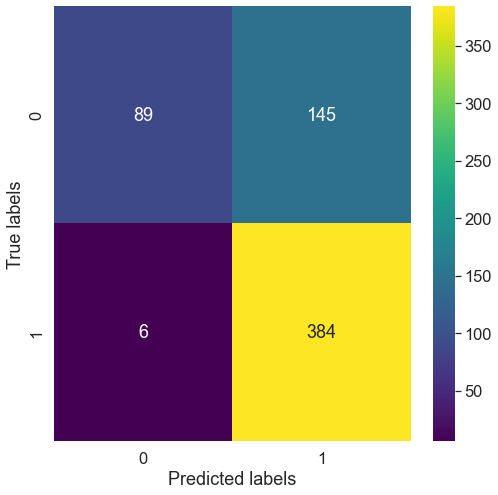

In [42]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1.5)
sns.heatmap(cm_SGD, annot=True, fmt=".0f", cmap="viridis")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.savefig("confusion_matrix_SGD.svg")